<a href="https://colab.research.google.com/github/martinclehman/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
# Begin by loading data into a dataframe. 
# Attribute info taken from above.
# '?' seen when glancing data -> Turn into NaNs
#    for example, search for ? using df.A1.value_counts()
import pandas as pd

columns = ["A" + str(i) for i in range(1,17)]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/" \
                 "credit-screening/crx.data",
                 header=None,
                 names=columns,
                 na_values='?')   # Replace ? with NaN
                                  # Or can do: df.replace('?', np.NaN, inplace = True))
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [2]:
#Let's check the UCI dataset description
!curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names'


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [3]:
'''Data matches appropriate observations from UCI - 
"#5.  Number of Instances: 690"
"#6.  Number of Attributes: 15 + class attribute"
'''
df.shape

(690, 16)

In [4]:
# Check that NaN's match dataset description
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
# Check datatypes
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [6]:
# Continuous variables need to be converted to float, so convert A11 & A15 
df['A11'] = df['A11'].astype('float') 
df['A15'] = df['A15'].astype('float') 
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [0]:
# Might make more sense to turn column A16 into a boolean
# df.replace(['+','-'],[1,0], inplace=True)
# df.dtypes

# May make more sense to rename column A16 to 'Aprroval'
# df = df.rename(columns={"A16": "Approval"})

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [0]:
# SOLUTION
# pd.plotting.scatter_matrix(df); # or use sns.pairplot(df)
# df.boxplot(vert=False, by='A16', showfliers=False);
  ## use showfliers because outliers are ruining boxplots
  ## A15 is stretching the range for the other features so we plot individually...
# Run boxplots in a list comprehension
# cont_columns = ['A2','A3','A8','A11','A14','A15']
# boxplots = [df.boxplot(column=col, by='A16', showfliers=False) for col in cont_columns]

In [10]:
# For the 6 continuous features, split up the dataset between the two class labels
approved = df[df['A16'] == '+']
rejected = df[df['A16'] == '-']

# Keep only continuous column types for ttest analysis
cont_columns = ['A2','A3','A8','A11','A14','A15']
approved_cont = approved[cont_columns]
rejected_cont = rejected[cont_columns]

# alternative method of selecting out continuous columns
# approved_cont = approved.select_dtypes(include=['float64'])
# rejected_cont = rejected.select_dtypes(include=['float64'])

print("Approved dataset shape:", approved_cont.shape)
print("Rejected dataset shape:", rejected_cont.shape)

Approved dataset shape: (307, 6)
Rejected dataset shape: (383, 6)


In [0]:
# Generalize ttest calculation and plot into a function
def compare_cases(feature,plot=False):
  group1 = approved[feature].dropna()
  group2 = rejected[feature].dropna()
  
  statistic, pvalue = ttest_ind(group1, group2, equal_var=False)
    #If you don't .dropna() the two groups, you can also run ttest_ind with option "non_policy='omit'"  
  if plot==True:
    sns.kdeplot(group1, color='black', legend=None);
    sns.kdeplot(group2, color='red', legend=None);
  
  return statistic,pvalue

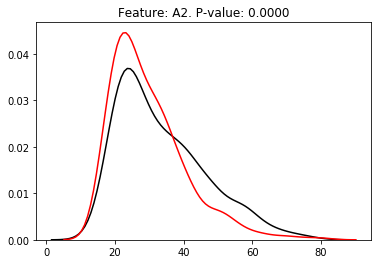

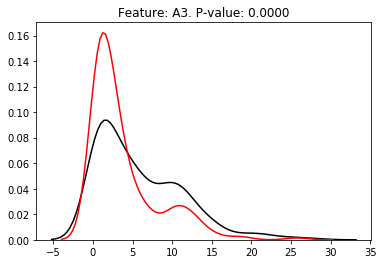

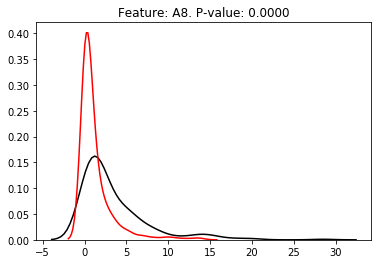

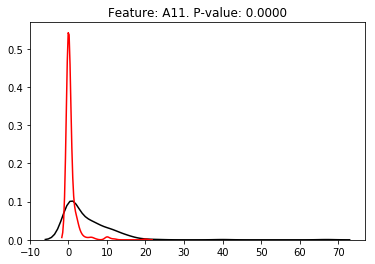

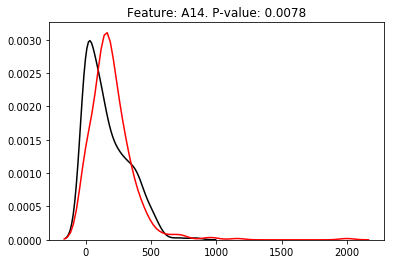

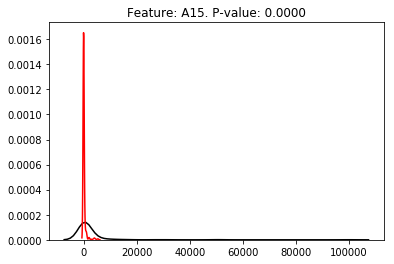

<Figure size 432x288 with 0 Axes>

In [12]:
# Let's go ahead and visually compare all 6 continuous varriable distributions
# SOLUTION uses side by side boxplots (see a few codeblocks above. I actually prefer SOLUTION's version slightly
for feature in approved_cont.columns:
  statistic,pvalue = compare_cases(feature, True)
  plt.title(f'Feature: {feature}. P-value: {pvalue:.4f}')
  plt.figure()

In [13]:
# Print a table of ttest results
for feat in approved_cont.columns:
  statistic, pvalue = compare_cases(feat)
  print(f"Feature: {feat:3s}       t-test: {statistic: 7.3f}"\
                             f"     p-value: {pvalue:8.6f}")

Feature: A2        t-test:   4.224     p-value: 0.000028
Feature: A3        t-test:   5.393     p-value: 0.000000
Feature: A8        t-test:   8.380     p-value: 0.000000
Feature: A11       t-test:  10.638     p-value: 0.000000
Feature: A14       t-test:  -2.670     p-value: 0.007778
Feature: A15       t-test:   4.197     p-value: 0.000035


In [0]:
# Load chi2 library
from scipy.stats import chi2_contingency

In [15]:
# Now look at categorical columns and examine with chi-squared test

# Select categorical columns
cat_columns = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']

for feat in cat_columns:
  table_temp = pd.crosstab(df[feat],df['A16'])
  chi2, p, dof, expect = chi2_contingency(table_temp)  
                         # should turn off Yates correction for chi2_contingency
                         # (see documentation)
  
  print(f"Feature: {feat:3s}       Chi2: {chi2: 8.3f}"\
                         f"     p-value: {p:8.6f}")


Feature: A1        Chi2:    0.311     p-value: 0.576894
Feature: A4        Chi2:   26.234     p-value: 0.000002
Feature: A5        Chi2:   26.234     p-value: 0.000002
Feature: A6        Chi2:   98.325     p-value: 0.000000
Feature: A7        Chi2:   45.034     p-value: 0.000000
Feature: A9        Chi2:  355.204     p-value: 0.000000
Feature: A10       Chi2:  143.070     p-value: 0.000000
Feature: A12       Chi2:    0.568     p-value: 0.450946
Feature: A13       Chi2:    9.192     p-value: 0.010094


In [31]:
# SOLUTION puts crosstabs into a list comprehension
# This way is cleverer

cat_columns = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']
crosstabs = [pd.crosstab(df.A16,df[feature]) for feature in cat_columns]
crosstabs[0]
  
for crosstab in crosstabs:
  print(crosstab) 
  chi2 = (chi2_contingency(crosstab, correction=False)) # No Yates correction
  print('Chi-square statistic: {}'.format(chi2[0]))
  print('p-value: {}'.format(chi2[1]))
  print('\n')

A1     a    b
A16          
+     98  206
-    112  262
Chi-square statistic: 0.41143508194591916
p-value: 0.5212420117494805


A4   l    u    y
A16             
+    2  256   45
-    0  263  118
Chi-square statistic: 26.234074966202144
p-value: 2.010680204180363e-06


A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
Chi-square statistic: 26.234074966202144
p-value: 2.010680204180363e-06


A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6
Chi-square statistic: 98.32520342679135
p-value: 3.4999300402715717e-15


A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
+    25   2   8  87  3  2  1  169  6
-    34   4  49  51  5  2  1  230  2
Chi-square statistic: 45.034207140240554
p-value: 3.625452872372267e-07


A9     f    t
A16          
+     23  284
-    306   77


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- The t-test on each continuous feature  generates values that are all above the 99% confidence interval. Therefore, we would generally reject the null hypothesis that the two samples were obtained from the same distribution.
- The Chi2 test on all features revealed results that were above and below typical null hypothesis testing levels. For 'A1' for example, the p-value yielded a result of 0.577 which suggests a likelihood that there **was not** a relationship of 'A1' on getting the applicant approved. For 'A4' for example, the p-value was much above the 99.9% confidence interval which suggests a high likelihood that there **was** a relationship of 'A1' on getting the applicant approved.
- Solving a pernicious bug when assigning 'df' to both the dataframe and degrees of freedom.

**SOLUTION**

Continuous: 
- A8 had an extremely large and positive test statistic, sugesting that (whatever it represents) it is a characteristic that peole who get credit approved have much more strongly than those who fail to get approved for credit
- A14 had a still significant but relatively smaller and negative test statistic, suggesting that it is a characteristic more common/extreme amongst peole who fail to get approved for credit

Categorical (note- Chi-squared itself doesn't really tell us much, so we have to look at the counts themselves):
- A9 is a simple t/f category with an extremely different distribution between those who receive credit and don't, suggesting some sort of relationship
- A1 is two categories like A( (though a/b instead of t/f), but much less dramatically diferent - we cannot reject the null hypothesis tat A1 is independent of our class label, with a rather large p-value.)

